In [4]:
"""
Raw Python version of jupyter notebooks from fast.ai course
"""

__author__ = "Vinay Kumar"

In [5]:
## Importing the necessary libraries
from fastai import *
from fastai.vision import *

In [6]:
## Setting the hyperparams
bs = 16     # batch-size
num_epochs = 1

In [10]:
## Looking at the data
"""We are going to use 'Oxford-IIIT Pet Dataset' by O.M.Parkhi et al., 2012 which features
12 cat breeds and 25 dog breeds. Our model will need to learn to differentiate between these
37 breeds. According to the paper the best accuracy they could get in 2012 was 59.21%, using
a complex model the was specific to pet-detection, with separate 'Image', 'Head', 'Body' models
for the pet photos. Let's see how accurate we can be using Deep Learning!

We are going to use `untar_data` function to which we must pass a URL argument & which will
download and extract the data.
"""

"We are going to use 'Oxford-IIIT Pet Dataset' by O.M.Parkhi et al., 2012 which features\n12 cat breeds and 25 dog breeds. Our model will need to learn to differentiate between these\n37 breeds. According to the paper the best accuracy they could get in 2012 was 59.21%, using\na complex model the was specific to pet-detection, with separate 'Image', 'Head', 'Body' models\nfor the pet photos. Let's see how accurate we can be using Deep Learning!\n\nWe are going to use `untar_data` function to which we must pass a URL argument & which will\ndownload and extract the data.\n"

In [12]:
help(untar_data)
path = untar_data(URLs.PETS)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [18]:
path

PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet')

In [19]:
path.ls()

[PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet/images')]

In [20]:
path_anno = path/"annotations"
path_img = path/"images"

In [21]:
"""The first thing we do when we approach a problem is to take a look at the data.
We always need to understand very well what the problem is and what kind of data is available
before we can figure out how to solve it. Taking a look at the data means:
1. Understanding how the data directories are sturctured,
2. What the labels are, and
3. What the sample data look like.

The main difference b/w handeling of image-classification datasets is the way labels are stored.
In this particular Oxford-pets dataset; the labels are stored in the filenames themselves.
We will need to extract them to be able to classify the images into correct categories.
We'll use fastai's `ImageDataBunch.from_name_re` method to get the labels using a
regular-expression.
"""

fnames = get_image_files(path_img)
fnames[:5]


[PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_6.jpg'),
 PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet/images/chihuahua_47.jpg'),
 PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet/images/scottish_terrier_112.jpg'),
 PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_110.jpg'),
 PosixPath('/home/potter217/.fastai/data/oxford-iiit-pet/images/British_Shorthair_88.jpg')]

In [22]:
np.random.seed(2)
re_pat = r"/([^/]+)_\d+.jpg$"

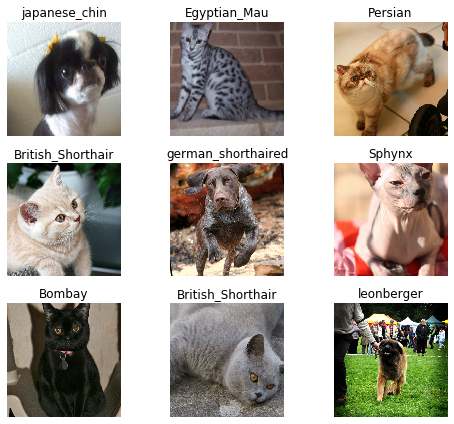

In [23]:
data = ImageDataBunch.from_name_re(path_img, fnames, re_pat, ds_tfms=get_transforms(),
                                   size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [25]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [29]:
print(len(data.classes), data.c)

True

In [30]:
## Training resnet34
"""Now we will train our model. We will use a CNN backbone and a fully connected head with a
single hidden layer as a classifier.
"""
learn = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate)
print(learn.model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [31]:
learn.fit_one_cycle(cyc_len=num_epochs)
learn.save("stage-1")

epoch,train_loss,valid_loss,error_rate,time
0,0.701014,0.284824,0.088633,21:23


In [32]:
#RESULTS
"""
Let's see what results have we got.
We'll see what are the categories that the model most confused with one another.
We will try to see if what the model predicted was reasonable or not.
Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily
skewed i.e. the model makes the same mistakes over and over again but  it rarely confuses
other categories. This suggests that it just finds it difficult to distinguish b/e some specific
categories, which is a normal behaviour.
"""

"\nLet's see what results have we got.\nWe'll see what are the categories that the model most confused with one another.\nWe will try to see if what the model predicted was reasonable or not.\nFurthermore, when we plot the confusion matrix, we can see that the distribution is heavily\nskewed i.e. the model makes the same mistakes over and over again but  it rarely confuses\nother categories. This suggests that it just finds it difficult to distinguish b/e some specific\ncategories, which is a normal behaviour.\n"

In [33]:
interp = ClassificationInterpretationnnnnn.from_learner(learn)

In [34]:
losses, idxs = interp.top_losses()

In [35]:
print(len(data.valid_ds) == len(losses) == len(idxs))

True


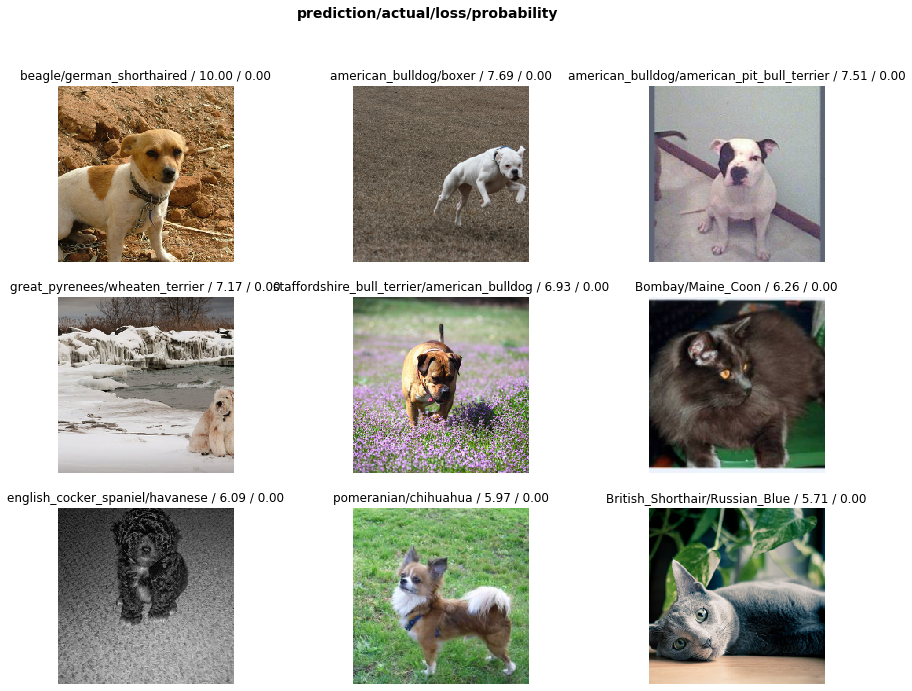

In [36]:
interp.plot_top_losses(9, figsize=(15,11))

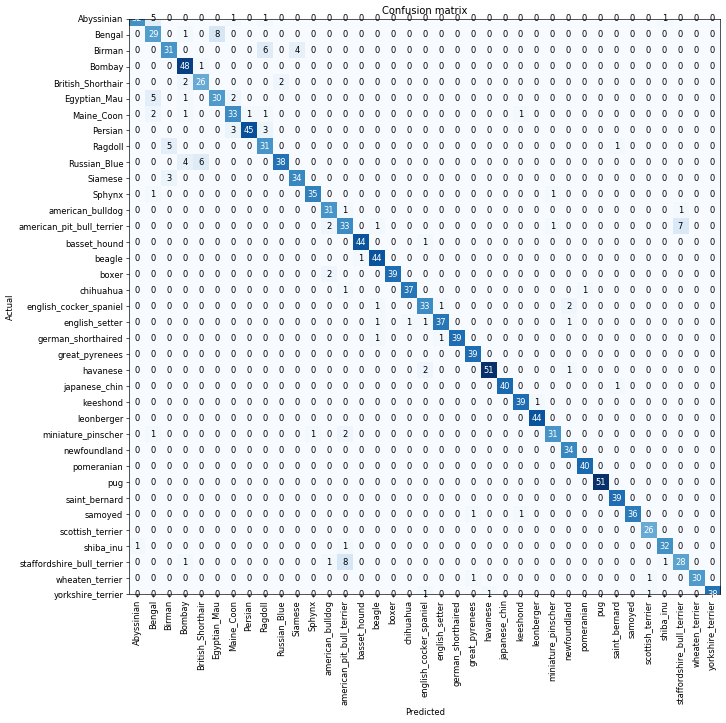

In [37]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [38]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Birman', 'Ragdoll', 6),
 ('Russian_Blue', 'British_Shorthair', 6),
 ('Abyssinian', 'Bengal', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 5),
 ('Birman', 'Siamese', 4),
 ('Russian_Blue', 'Bombay', 4),
 ('Persian', 'Maine_Coon', 3),
 ('Persian', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('British_Shorthair', 'Bombay', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('havanese', 'english_cocker_spaniel', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2)]